# Introduction


**What?** GMM = Gaussian Mixture Model as Density Estimation



# Theoretical recall


- Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation. 
- That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data. 



# Import modules

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn import mixture
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 7
rcParams['font.size'] = 20

# Create a synthetic dataset

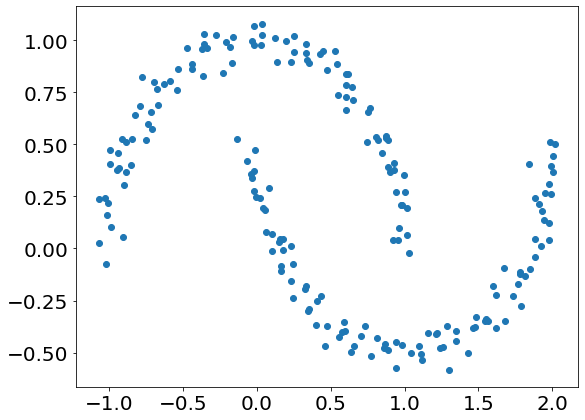

In [2]:
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0) 
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

# Plotting routines

In [3]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""

    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width,
                     nsig * height, angle, **kwargs))

In [4]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# Fitting a GMM clustering


- If we try to fit this to a two-component GMM viewed as a clustering model, the results are not particularly useful
- But if we instead use many more components and ignore the cluster labels, we find a fit that is much closer to the input data 



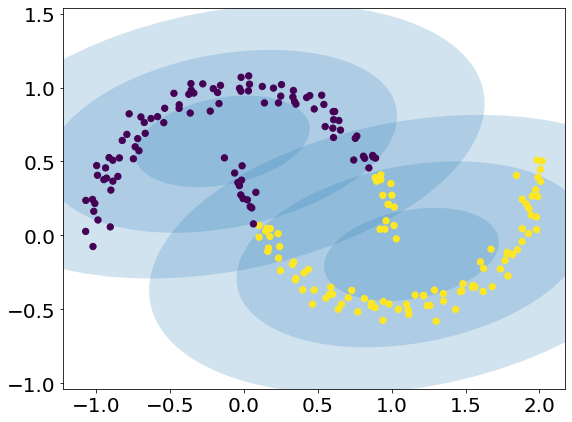

In [6]:
model1 = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=0)
model1.fit(Xmoon);
plot_gmm(model1, Xmoon)

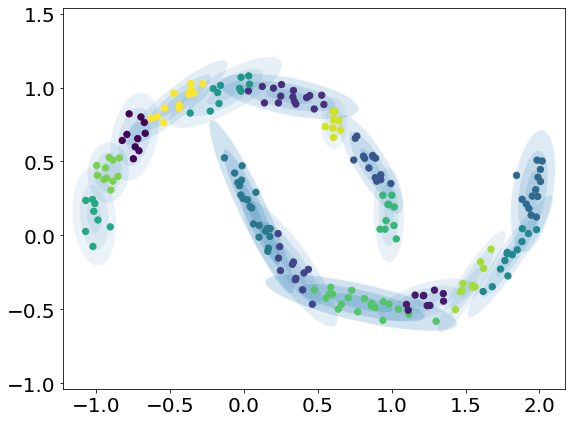

In [8]:
model2 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
model2.fit(Xmoon);
plot_gmm(model2, Xmoon)

# Why is that useful?


- Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall  distribution of the input data. 
- This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input. 
- For example, we can generate 400 new points drawn from this 16-component GMM fit to our original data. 



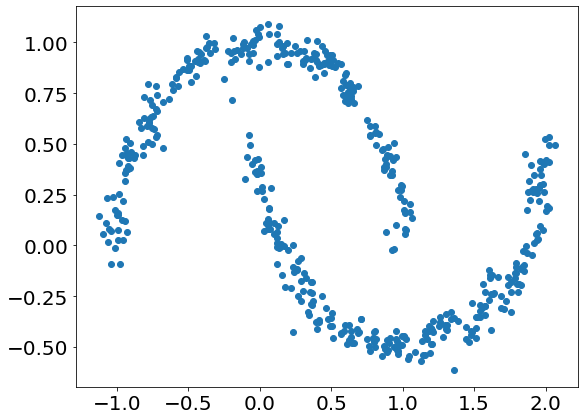

In [16]:
Xnew = model2.sample(500)
x,y = [],[]
for i in range(len(Xnew[0])):
    x.append(Xnew[0][i][0])
    y.append(Xnew[0][i][1])
plt.scatter(x, y);

# How many many components?


- The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. 
- A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid overfitting. 
- Another means of correcting for overfitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). 
- The **optimal number** of clusters is the value that minimizes the AIC or BIC.



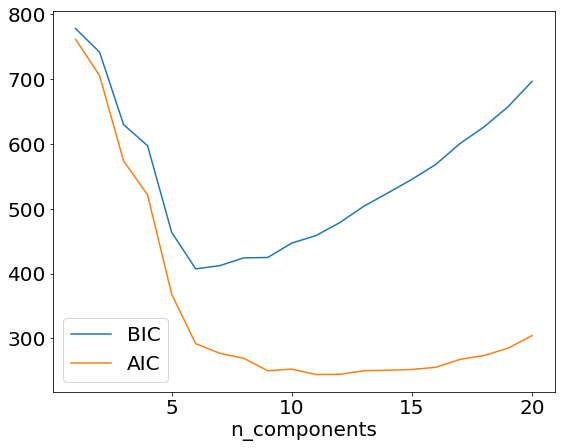

In [17]:
n_components = np.arange(1, 21)
#model = (n_components=16, covariance_type='full', random_state=0)

models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC') 
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC') 
plt.legend(loc='best')
plt.xlabel('n_components');

# References


- VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
- https://github.com/jakevdp/PythonDataScienceHandbook
    


# Conclusions


- Notice the important point: this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm. 
- I’d encourage you to think of GMM primarily as a density estimator, and use it for clustering only within simple datasets.

